In [0]:
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint

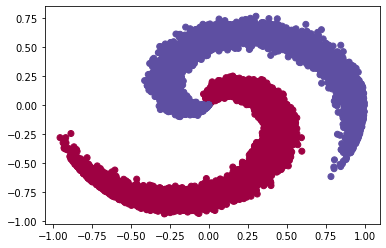

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a spiral dataset
n = 10000   # number of points per class
d = 3      # dimensionality(features)
k = 2     # number of classes

X = np.zeros((n*k,d))
y = np.zeros(n*k, dtype='uint8')

for j in range(k):
    ix = range(n*j,n*(j+1))
    r = np.linspace(0.0,1,n) # radius
    t = np.linspace(j*4,(j+1)*4,n) + np.random.randn(n)*0.2 # theta
    # For d>2, use a random angle for the additional dimensions
    if d > 2:
        a = np.random.uniform(0, 2*np.pi, n)
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t), r*np.sin(a)]
    else:
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()



In [0]:
X

Out[97]: array([[ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.40978975e-05,  9.40177307e-05, -6.78603717e-05],
       [ 6.23827240e-05,  1.90043145e-04, -1.92893802e-04],
       ...,
       [ 9.42768736e-01, -3.32846978e-01, -9.74776304e-01],
       [ 9.58883467e-01,  2.83447501e-01, -2.36276804e-01],
       [ 9.82120452e-01, -1.88253598e-01, -3.04007711e-02]])

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame()
df['y']= y

In [0]:
df['y'].unique()

Out[100]: array([0, 1], dtype=uint8)

In [0]:
from pyspark.sql.types import ArrayType, StructField, StructType, FloatType, IntegerType

In [0]:
x = 0
data = list()
for i in X:
    data.append([float(i[0]), float(i[1]), float(i[2]), float(y[x])])
    x+=1
    
data
    


Out[102]: [[0.0, 0.0, -0.0, 0.0],
 [3.409789745027237e-05, 9.401773071878898e-05, -6.78603717481419e-05, 0.0],
 [6.2382724009863e-05, 0.0001900431449573209, -0.00019289380234478604, 0.0],
 [4.7546769335358964e-05, 0.0002962385988120559, 0.0002539841268407255, 0.0],
 [5.374577624983653e-05, 0.000396413163676413, 0.0002957029698212204, 0.0],
 [-0.00013267416776414817, 0.00048212817041642654, 0.0004017092711667573, 0.0],
 [0.00015506669928018097, 0.0005796777808194741, -0.00030441013501335143, 0.0],
 [-0.00023194334262207294, 0.0006605303176352013, 0.0006276038962803711, 0.0],
 [0.00013522516698899386, 0.000788569701050807, -0.0004906598510820083, 0.0],
 [-0.00010024240663942905,
  0.0008944906283546943,
  -0.00028104282254340184,
  0.0],
 [-5.447903112350532e-05, 0.0009986150735753214, 0.0009047721241890029, 0.0],
 [-0.00014420305400775026, 0.0010906179512183349, -0.0005542701910442827, 0.0],
 [-0.0004473637826656534, 0.0011136218789000326, -0.0011313393008292093, 0.0],
 [-9.317722153012

In [0]:
from pyspark.sql.functions import monotonically_increasing_id

schema = StructType([
    StructField('X0', FloatType(), True),
    StructField('X1', FloatType(), True),
    StructField('X2', FloatType(), True),
    StructField('y', FloatType(), True)
])

myData = spark.sparkContext.parallelize(data)
df = spark.createDataFrame(myData,schema)
print(df.schema)
df = df.withColumn("id", monotonically_increasing_id())

StructType([StructField('X0', FloatType(), True), StructField('X1', FloatType(), True), StructField('X2', FloatType(), True), StructField('y', FloatType(), True)])


In [0]:
display(df)

X0,X1,X2,y,id
0.0,0.0,-0.0,0.0,0
3.40979E-5,9.4017734E-5,-6.786037E-5,0.0,1
6.238272E-5,1.9004314E-4,-1.928938E-4,0.0,2
4.7546768E-5,2.962386E-4,2.5398412E-4,0.0,3
5.3745774E-5,3.9641318E-4,2.9570298E-4,0.0,4
-1.3267416E-4,4.8212818E-4,4.0170926E-4,0.0,5
1.550667E-4,5.7967776E-4,-3.0441015E-4,0.0,6
-2.3194334E-4,6.605303E-4,6.276039E-4,0.0,7
1.3522517E-4,7.885697E-4,-4.9065985E-4,0.0,8
-1.002424E-4,8.9449063E-4,-2.8104283E-4,0.0,9


In [0]:
df.y.distinct

Out[105]: Column<'y[distinct]'>

# Randomize dataset

In [0]:
from pyspark.sql.functions import rand
import pyspark.sql.functions as F
# Randomly sort the DataFrame by a random column
df = df.select("*").orderBy(F.rand())

In [0]:
display(df)

X0,X1,X2,y,id
0.15818475,-0.6374314,0.6361186,0.0,17179870631
-0.004272684,0.6026451,0.32450464,1.0,51539608218
0.5659581,0.47375566,-0.7380601,1.0,51539609572
0.48797572,-0.27260116,0.13442823,0.0,17179869653
0.0398903,0.08391007,-0.046161633,0.0,929
0.5144482,0.5923735,0.17398751,1.0,60129542581
0.40335634,-0.38188285,-0.29421645,0.0,17179869618
-0.12053362,-0.046834607,-0.10687665,1.0,34359739421
-0.15616487,0.50778186,0.06402129,1.0,42949675984
0.103027776,0.15295568,-0.13564554,0.0,1844


In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


In [0]:
# Define the feature columns
feature_cols = ['X0', 'X1', 'X2']
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

In [0]:
new = vectorAssembler.transform(df)

In [0]:
new.show()

+------------+------------+------------+---+-----------+--------------------+
|          X0|          X1|          X2|  y|         id|            features|
+------------+------------+------------+---+-----------+--------------------+
|  0.15818475|  -0.6374314|   0.6361186|0.0|17179870631|[0.15818475186824...|
|-0.004272684|   0.6026451|  0.32450464|1.0|51539608218|[-0.0042726839892...|
|   0.5659581|  0.47375566|  -0.7380601|1.0|51539609572|[0.56595808267593...|
|  0.48797572| -0.27260116|  0.13442823|0.0|17179869653|[0.48797571659088...|
|   0.0398903|  0.08391007|-0.046161633|0.0|        929|[0.03989030048251...|
|   0.5144482|   0.5923735|  0.17398751|1.0|60129542581|[0.51444822549819...|
|  0.40335634| -0.38188285| -0.29421645|0.0|17179869618|[0.40335634350776...|
| -0.12053362|-0.046834607| -0.10687665|1.0|34359739421|[-0.1205336228013...|
| -0.15616487|  0.50778186|  0.06402129|1.0|42949675984|[-0.1561648696660...|
| 0.103027776|  0.15295568| -0.13564554|0.0|       1844|[0.10302

# Basic Pipeline classifier using Logistic Regression

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


# Define the feature columns
feature_cols = ['X0', 'X1', 'X2']

# Create a vector assembler to combine the features into a single vector column
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Create a standard scaler to scale the features
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures', withMean=True, withStd=True)

# Create a logistic regression model
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='y', maxIter=10)

# Define the pipeline stages
stages = [vectorAssembler, scaler, lr]

# Create the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
model = pipeline.fit(df)

# Make predictions on new data
predictions = model.transform(df)

# Show the results
predictions.show()

+------------+------------+------------+---+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|          X0|          X1|          X2|  y|         id|            features|      scaledFeatures|       rawPrediction|         probability|prediction|
+------------+------------+------------+---+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|  0.15818475|  -0.6374314|   0.6361186|0.0|17179870631|[0.15818475186824...|[0.08284984692588...|[4.40850343051828...|[0.98797302594398...|       0.0|
|-0.004272684|   0.6026451|  0.32450464|1.0|51539608218|[-0.0042726839892...|[-0.3536631688952...|[-3.7634420575245...|[0.02267753077724...|       1.0|
|   0.5659581|  0.47375566|  -0.7380601|1.0|51539609572|[0.56595808267593...|[1.17851139952122...|[-2.5048985997927...|[0.07551548267781...|       1.0|
|  0.48797572| -0.27260116|  0.13442823|0.0|17179869653|[0.48797571659088...|[0.96897763

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Create an evaluator with F1 score as the metric


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.linalg import Matrix

# Convert the predictions DataFrame to an RDD
predictions_rdd = predictions.select(['prediction', 'y']).rdd

# Create a MulticlassMetrics object with the RDD
metrics = MulticlassMetrics(predictions_rdd)

# Get the confusion matrix as a PySpark Matrix object
confusion_matrix = metrics.confusionMatrix()

# Extract the counts of TT, TF, FF, and FT values from the matrix
tt_count = confusion_matrix[0, 0]
tf_count = confusion_matrix[0, 1]
ft_count = confusion_matrix[1, 0]
ff_count = confusion_matrix[1, 1]

# Print the counts
print(f"TT: {tt_count}, TF: {tf_count}, FT: {ft_count}, FF: {ff_count}")

TT: 6774.0, TF: 3226.0, FT: 2565.0, FF: 7435.0


In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol='y', predictionCol='prediction', metricName='f1')

# Evaluate the model on the predictions
f1_score = evaluator.evaluate(predictions)

# Print the F1 score
print('F1 score:', f1_score)

F1 score: 0.7101333779640836


In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Define the feature columns
feature_cols = ['X0', 'X1', 'X2']

# Create a vector assembler to combine the features into a single vector column
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol='assembled_features')

# Create a standard scaler to scale the features
scaler = StandardScaler(inputCol='assembled_features', outputCol='scaledFeatures', withMean=True, withStd=True)

# Create the classifiers
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='y', maxIter=10)
rf = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='y', numTrees=100)

# Define the pipeline stages
stages = [vectorAssembler, scaler]

# Create the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
pipeline_model = pipeline.fit(df)



In [0]:
# Transform the data
transformed_data = pipeline_model.transform(df)

# Split the data into training and test sets
(trainingData, testData) = transformed_data.randomSplit([0.7, 0.3], seed=42)

# Drop the "prediction" column from the training data
trainingData = trainingData.drop('prediction')

In [0]:
# Create a dictionary to hold the classifier models and predictions
models_and_predictions = {}

In [0]:
# Train and evaluate the Logistic Regression model
lr_model = lr.fit(trainingData)
lr_predictions = lr_model.transform(testData).select('id', 'probability', 'prediction', 'rawPrediction')
models_and_predictions['Logistic Regression'] = lr_predictions.withColumnRenamed('prediction', 'lr_prediction')


In [0]:
# Train and evaluate the Random Forest model
rf_model = rf.fit(trainingData)
rf_predictions = rf_model.transform(testData).select('id', 'probability', 'prediction', 'rawPrediction')
models_and_predictions['Random Forest'] = rf_predictions.withColumnRenamed('prediction', 'rf_prediction')


In [0]:
# Join the predictions of all the models
predictions = models_and_predictions['Logistic Regression'].select('id', 'lr_prediction')\
    .join(models_and_predictions['Random Forest'].select('id', 'rf_prediction'), 'id')\
    .join(df.selectExpr('id', 'y as label'), 'id')

# Join the predictions with the original DataFrame on the id column to add the label column
predictions_with_labels = predictions.join(df.select('id', 'y'), 'id')

In [0]:
display(predictions)

id,lr_prediction,rf_prediction,label
25769806607,0.0,0.0,0.0
25769806546,0.0,0.0,0.0
25769806325,0.0,0.0,0.0
25769806469,0.0,0.0,0.0
25769806565,0.0,0.0,0.0
25769806542,0.0,0.0,0.0
25769806512,0.0,0.0,0.0
25769806396,0.0,0.0,0.0
25769806566,0.0,0.0,0.0
25769806384,0.0,0.0,0.0


In [0]:
display(predictions_with_labels)

id,lr_prediction,rf_prediction,label,y
25769806607,0.0,0.0,0.0,0.0
25769806546,0.0,0.0,0.0,0.0
25769806325,0.0,0.0,0.0,0.0
25769806469,0.0,0.0,0.0,0.0
25769806565,0.0,0.0,0.0,0.0
25769806542,0.0,0.0,0.0,0.0
25769806512,0.0,0.0,0.0,0.0
25769806396,0.0,0.0,0.0,0.0
25769806566,0.0,0.0,0.0,0.0
25769806384,0.0,0.0,0.0,0.0


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Create a binary classification evaluator
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol='lr_prediction', labelCol='label')

# Evaluate the Logistic Regression model
lr_accuracy = binary_evaluator.evaluate(predictions_with_labels)
print(f"Logistic Regression accuracy: {lr_accuracy}")

# Create a multiclass classification evaluator
multi_evaluator = MulticlassClassificationEvaluator(predictionCol='lr_prediction', labelCol='label', metricName='f1')

# Evaluate the Logistic Regression model
lr_f1 = multi_evaluator.evaluate(predictions_with_labels)
print(f"Logistic Regression F1 score: {lr_f1}")

Logistic Regression accuracy: 0.7094783577059794
Logistic Regression F1 score: 0.7090155121945734


In [0]:
# Create a binary classification evaluator
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol='rf_prediction', labelCol='label')

# Evaluate the Random Forest model
rf_accuracy = binary_evaluator.evaluate(predictions_with_labels)
print(f"Random Forest accuracy: {rf_accuracy}")

# Create a multiclass classification evaluator
multi_evaluator = MulticlassClassificationEvaluator(predictionCol='rf_prediction', labelCol='label', metricName='f1')

# Evaluate the Random Forest model
rf_f1 = multi_evaluator.evaluate(predictions_with_labels)
print(f"Random Forest F1 score: {rf_f1}")


Random Forest accuracy: 0.9919362323470182
Random Forest F1 score: 0.9919110469622093


# Using XAI Shap on the models

In [0]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 33.2 MB/s eta 0:00:00


In [0]:
import numpy as np
import shap

# idx = 0
# Convert PySpark DataFrame to NumPy array
test_data = np.array(testData.select(feature_cols).collect())

# Initialize a TreeExplainer instance for the random forest model
rf_explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values for the test data
rf_shap_values = rf_explainer.shap_values(test_data)


check_additivity requires us to run predictions which is not supported with spark, ignoring. Set check_additivity=False to remove this warning


In [0]:
print(rf_shap_values)

[array([[-3.14814033e-01,  6.67475843e-02, -3.33019449e-04],
       [-3.15689070e-01,  6.68827434e-02,  4.06858219e-04],
       [-3.14740082e-01,  6.66337781e-02, -2.93164704e-04],
       ...,
       [ 3.38877658e-01,  1.41183286e-01,  8.74068559e-03],
       [ 2.50947089e-01,  1.82664775e-01,  8.84044341e-03],
       [ 2.51293849e-01,  1.82590277e-01,  7.39211390e-03]]), array([[ 3.14814033e-01, -6.67475843e-02,  3.33019449e-04],
       [ 3.15689070e-01, -6.68827434e-02, -4.06858219e-04],
       [ 3.14740082e-01, -6.66337781e-02,  2.93164704e-04],
       ...,
       [-3.38877658e-01, -1.41183286e-01, -8.74068559e-03],
       [-2.50947089e-01, -1.82664775e-01, -8.84044341e-03],
       [-2.51293849e-01, -1.82590277e-01, -7.39211390e-03]])]


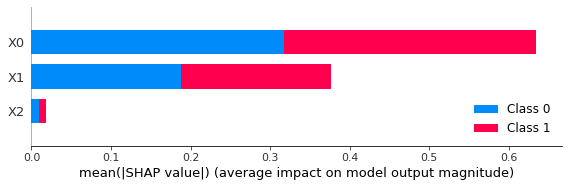

In [0]:
shap.summary_plot(rf_shap_values, test_data, feature_names=feature_cols)


In [0]:
print(test_data.shape)
print(len(feature_cols))



(5934, 3)
3


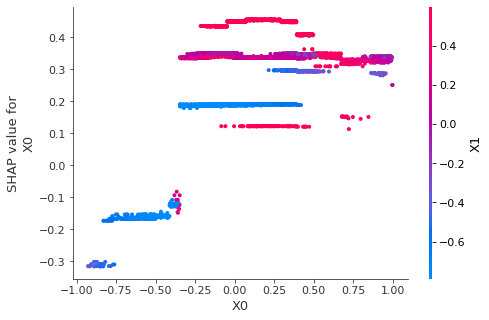

In [0]:
shap.dependence_plot(0, rf_shap_values[0], test_data, feature_names=feature_cols)

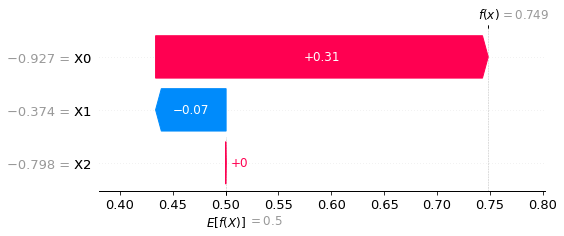

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
row_to_explain = testData.select(feature_cols).limit(1).toPandas()

# Initialize a TreeExplainer instance for the random forest model
rf_explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values for the test data
rf_shap_values = rf_explainer.shap_values(row_to_explain)

# Create the waterfall plot
shap.initjs()
shap.waterfall_plot(shap.Explanation(values=rf_shap_values[1][0], base_values=rf_explainer.expected_value[1], data=row_to_explain.iloc[0]), max_display=10)

In [0]:
# Calculate the feature importances for the Random Forest model
rf_feature_importances = np.abs(rf_shap_values).mean(axis=0)

# Print the feature importances for the Random Forest model
print('Random Forest feature importances:')
for i in range(len(feature_cols)):
    print(f'{feature_cols[i]}: {rf_feature_importances[i]}')

Random Forest feature importances:
X0: [0.31481403 0.06674758 0.00033302]
X1: [0.31568907 0.06688274 0.00040686]
X2: [3.14740082e-01 6.66337781e-02 2.93164704e-04]
